# Classification

![galaxies](assets/classification/hubble_tuning_fork.jpg)

(image: [NASA](https://imagine.gsfc.nasa.gov/educators/programs/cosmictimes/educators/guide/1929/nebulae.html))

# Topics

- Classification: binary, multi-class
- Logistic Regression
- Naïve Bayes Classification
- K-nearest Neighbours
- Support Vector Machines

## Where are we?

![one of many cheatsheets but I keep using it](assets/linear-regression/machine-learning-cheet-sheet.png)

(image: [sas.com](https://www.sas.com/en_us/insights/analytics/machine-learning.html))

## Classification

Given a sample with $n$ independent features

$X^i = [x^i_1, x^i_2, ..., x^i_n]$

Predict the probability $P(y)$ that this sample belongs to a class $y$

i.e. we "classify" the sample as belonging to $y$

## Algorithms for Classification

- Logistic Regression*
- Naive Bayes*
- K-nearest Neighbours*
- Support Vector Machines*
- Decision Trees and Forests
- Neural Networks
- etc

[* Covered today]

## Logistic Regression

Linear Regression + either Activation or Softmax

Activation: Binary Classification

Softmax: Multi-class Classification

## Binary

![your mood today?](assets/classification/logistic-regression.png)

(image: dataaspirant.com)

## Logistic Sigmoid

Converts the output to a value between 0 and 1
- 1 can mean True, Happy, ...
- 0 can mean False, Sad, ...

$$\sigma(x) = \frac{1}{1+exp(-x)}$$

In [2]:
# Credits: https://ilparle.com/2017/04/21/plot-a-simple-sigmoid-function/
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-8, 8, 0.1)
sigmoid = 1 / (1 + np.exp(-x))

fig, ax = plt.subplots()
ax.plot(x, sigmoid)
ax.set(xlabel = 'x', ylabel = 'sigmoid')
ax.grid()
plt.show()

<Figure size 640x480 with 1 Axes>

## Multi-Class

![mnist logistic regression](assets/classification/mnist-logistic-regression.png)

(image: [CNTK](https://cntk.ai/pythondocs/CNTK_103B_MNIST_LogisticRegression.html))

## Softmax

Softmax:
- Converts multiple outputs to a percentage distribution between 0 and 1
- Percentage distribution: numbers all add up to 1 (100%)
- Outputs: 0.7 happy, 0.2 depressed, 0.1 unknown

Example: [1, 2, 3, 4, 1, 2, 3]

Result: [0.024, 0.064, 0.175, 0.475, 0.024, 0.064, 0.175]

In [3]:
# Credits: https://en.wikipedia.org/wiki/Softmax_function
import numpy as np

z = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
softmax = lambda x : np.exp(x)/np.sum(np.exp(x))
softmax(z)

array([0.02364054, 0.06426166, 0.1746813 , 0.474833  , 0.02364054,
       0.06426166, 0.1746813 ])

![binary v. multiclass](assets/classification/binary_v_multiclass.png)

(image: [CNTK](https://cntk.ai/pythondocs/CNTK_103B_MNIST_LogisticRegression.html))

## Libraries

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [4]:
# Iris flower dataset
# https://archive.ics.uci.edu/ml/datasets/iris

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=99)

print('First 5 training data:', X_train[:5])
print('First 5 training labels:', y_train[:5])

First 5 training data: [[ 4.4         3.2         1.3        ...  0.76604595  0.07578385
  -0.31843662]
 [ 6.3         3.3         6.         ...  0.28485101 -0.21135445
  -0.06935848]
 [ 6.4         2.7         5.3        ... -0.38128404  0.50829624
  -0.61165156]
 [ 6.5         2.8         4.6        ...  0.75401256  0.68279975
  -2.8907748 ]
 [ 6.5         3.2         5.1        ... -1.14492702 -0.19688828
   0.50407722]]
First 5 training labels: [0 2 2 1 2]


In [5]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Number of mislabeled points out of test set of %d points:' % (X_test.shape[0]))
print('Logistic Regression: %d, Score: %f' % ((y_test != y_pred_lr).sum(), lr.score(X_test, y_test)))

Number of mislabeled points out of test set of 75 points:
Logistic Regression: 41, Score: 0.453333


## Naive Bayes Classification

![naive bayes](assets/classification/naive-bayes.png)

(image: [shatterline.com](http://shatterline.com/blog/2013/09/12/not-so-naive-classification-with-the-naive-bayes-classifier/))

## Bayes Theorem

- Inputs: independent features
- Outputs: class probabilities
  - Bayes Theorem computes the conditional probabilities

## Libraries

http://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes

- Gaussian
- Multinomial
- Bernoulli

In [6]:
from sklearn import naive_bayes

# Now that we added noise to our data, we need to scale the features to between [0, 1]
# This is because Naive Bayes cannot handle negative features (throws an error)
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train_minmax = min_max_scaler.transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

nb_titles = ['Gaussian Naive Bayes', 'Multinomial NB', 'Bernouilli NB']
nb_models = (naive_bayes.GaussianNB(),
             naive_bayes.MultinomialNB(),
             naive_bayes.BernoulliNB())
nb_models = (model.fit(X_train_minmax, y_train) for model in nb_models)

print('Number of mislabeled points out of test set of %d points:' % (X_test.shape[0]))

for model, title in zip(nb_models, nb_titles):
    y_pred = model.predict(X_test_minmax)
    wrong = (y_test != y_pred).sum()
    score = model.score(X_test_minmax, y_test)
    print('%s: %d (score: %.2f)' %(title, wrong, score))

Number of mislabeled points out of test set of 75 points:
Gaussian Naive Bayes: 14 (score: 0.81)
Multinomial NB: 24 (score: 0.68)
Bernouilli NB: 48 (score: 0.36)


## Support Vector Machines

![svm](assets/classification/svm.png)

(image: [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine))

## Support Vector Machines

- Inputs: features (not necessarily independent)
  - Features should be scaled
- Output: classes, separated by "hyperplane"

- SVM uses "kernel functions" to compute the similarity between input samples
- Find hyperplane with the maximum margin of separation
  - Why? Better generalization

## Libraries

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

- Support Vector Classifier
- Different kernel functions to choose from

Scikit-learn has a nifty example that shows how the different kernel functions look like.

To illustrate them, we'll use their code example to train SVM models with only 2 features.
- Why 2 features? Because it's easier to plot in 2-D

In [ ]:
# http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py
from sklearn import svm

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Args:
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional

    Returns:
        xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Args:
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, sub = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Take the first two features. We could avoid this by using a two-dim dataset
X_train_svc = X_train[:, :2]

# LinearSVC uses liblinear, SVC uses libsvm
# Both are different implementations of SVM
svm_titles = ['LinearSVC (liblinear)',
              'SVC (linear kernel)',
              'SVC (RBF kernel)',
              'SVC (3-degree polynomial kernel)']

# we create an instance of SVM and fit our data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svm_2D_models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
svm_2D_models = (clf.fit(X_train_svc, y_train) for clf in svm_2D_models)

X0, X1 = X_train_svc[:, 0], X_train_svc[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(svm_2D_models, svm_titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

Let's compare the performance of SVM with the other Classification models (Logistic Regression, Naive Bayes)

To do that, we retrain the SVM models with the full features.

### Exercise - Train and score SVM using different kernels

Train SVM models for the 4 kernel functions.

For each model:
- Scale X_train and X_test using sklearn.preprocessing.StandardScaler.
  - X_train and X_test are multi-dimensional numpy arrays, so you can pass them directly into the scaler without reshaping.
- Print the number of mislabeled points
- Print the score

Use all the features instead of just the first two.

Which model performs the best?

In [ ]:
# Your code here




























## K-nearest Neighbors

K-nearest neighbors is a multi-purpose algorithm that can be used for multi-class classification.

- Find K closest neighbors to that sample
- Classify by majority vote of the classes of that sample

![knn](assets/classification/knn.png)

(image: [dataaspirant.com](http://dataaspirant.com/2016/12/30/k-nearest-neighbor-implementation-scikit-learn/))

## Libraries

sklearn.neighbors.KNeighborsClassifier

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


In [7]:
from sklearn import neighbors

# K (how many neighbors to consider for the vote)
n_neighbors = [3, 5, 15]

# types of weights
weights = ['uniform', 'distance']

kn_models = []

for k in n_neighbors:
    for weight in weights:
        model = neighbors.KNeighborsClassifier(k, weights=weight)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        wrong = (y_test != y_pred).sum()
        score = model.score(X_test, y_test)
        print('k = %d, weights = %s: %d (score: %.2f)' %(k, weight, wrong, score))

k = 3, weights = uniform: 42 (score: 0.44)
k = 3, weights = distance: 43 (score: 0.43)
k = 5, weights = uniform: 40 (score: 0.47)
k = 5, weights = distance: 40 (score: 0.47)
k = 15, weights = uniform: 42 (score: 0.44)
k = 15, weights = distance: 39 (score: 0.48)


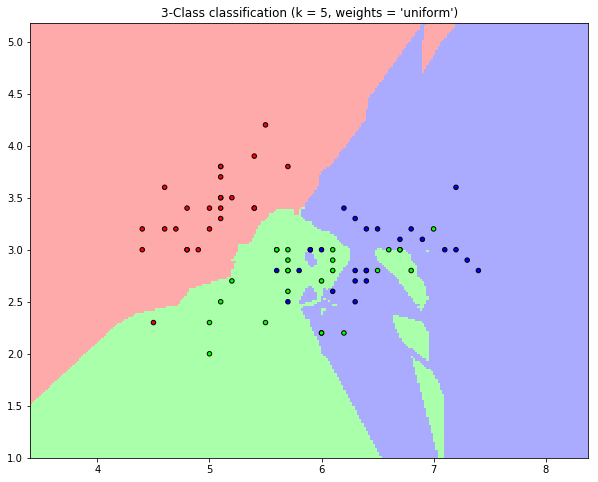

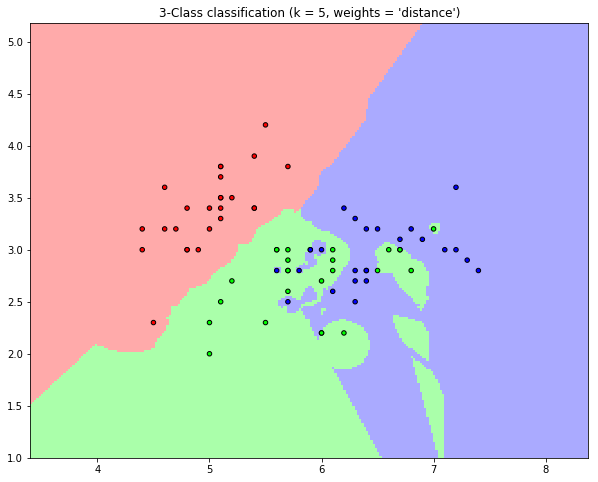

In [11]:
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_train_plot = X_train[:, :2]
h = .02  # step size in the mesh
n_neighbors = 5

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    clf.fit(X_train_plot, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train_plot[:, 0].min() - 1, X_train_plot[:, 0].max() + 1
    y_min, y_max = X_train_plot[:, 1].min() - 1, X_train_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train_plot[:, 0], X_train_plot[:, 1], c=y_train, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

## A Quick Comparison

|Criteria|Logistic Regression|Naive Bayes|SVM|K-nearest neighbors|
|--|--|--|--|--|
|Interpretability|Simple|Very simple (Conditional Probabilities)|Hard to understand parameters|Simple, but need to pick K|
|Ease of training|Fast to train|Fast to train|Computationally and memory intensive for high dimensional data|Can be expensive for high dimensional data|
|Requires independent features|Yes, but may still work|Yes, assumes independence|No (don't care)|No (don't care)|
|Feature value ranges|No requirements, scale if vary too widely|No negative features|Must scale to [-1, 1]|No requirements|
|Output usefulness|Returns probabilities and categories|Returns probabilities and categories|Returns probabilities and categories|Returns probabilities and categories|


## Evaluation Metrics for Classification Problems

- Confusion matrix
- Accuracy
- Precision, Recall, F1 score, ...
- Area Under Curve

Baselines: Random guess, Majority class

### Confusion Matrix

|Truth/Prediction|Predicted Happy|Predicted Sad|
|--|--|--|
|Actually Happy|**True positive count**|*False negative count*|
|Actually Sad|*False positive count*|**True negative count**|

### Example

|Truth/Prediction|Predicted Happy|Predicted Sad|
|--|--|--|
|Actually Happy|**4**|*3*|
|Actually Sad|*2*|**1**|

### Accuracy

Meaning: what proportion of the samples did the classifier predict correctly?

$$accuracy(y\_true, y\_pred) = \frac{true\_positives + true\_negatives}{total}$$

What's the accuracy in our example?

### Precision

Meaning: of the samples the classifier predicted TRUE, what proportion did it get correct (i.e. actually true)? The goal is to reduce false positives.

$$precision(y\_true, y\_pred) = \frac{true\_positives}{true\_positives + false\_positives}$$ 

What's the precision in our example?

### Recall (True Positive Rate / Sensitivity)

Meaning: of all the TRUE samples, what proprtion did the classifier predict to be TRUE? (How many of the TRUE predictions did the classifier recall)

$$recall(y\_true, y\_pred) = \frac{true\_positives}{true\_positives + false\_negatives}$$ 

What's the recall in our example?

### Specificity (True Negative Rate)

Meaning: of all the FALSE samples, what proportion did the clasifier predict to be FALSE?

$$specificity(y\_true, y\_pred) = \frac{true\_negatives}{true\_negatives + false\_positives}$$

What's the specificity in our example?

### F1 score / F measure

Meaning: a combination of both Precision and Recall in 1 number. This is a harmonic mean of two numbers that uses the standard equation 2AB/(A+B).

$$F(y\_true, y\_pred) = 2 * \frac{precision * recall}{precision + recall}$$

### What do they mean?

<img src='assets/classification/precisionrecall.svg.png' width=60%/>

(image: [Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall))

### Libraries

http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
- classification_report
- confusion_matrix
- accuracy_score
- f1_score
- ...

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print('Logistic Regression:')
print(classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

In [ ]:
# Colormaps:
# https://matplotlib.org/gallery/color/colormap_reference.html
plt.matshow(cm, cmap='Blues')
plt.colorbar()

In [ ]:
iris.target_names # the integer values [0, 1, 2] map to these labels

### Exercise - Evaluation Metrics for Naive Bayes and SVM Classifiers

For the Naive Bayes and SVM models we've seen so far:
1. Get the classification metrics.
2. Plot the confusion matrix
3. How would you interpret the results?

In [ ]:
# Get the classification metrics
# Your code here

























In [ ]:
# Plot the confusion matrices for Naive Bayes
# Your code here











In [ ]:
# Plot the confusion matrices for SVM
# Your code here













### Area under ROC curve

ROC curve: Receiver Operating Characteristic

A plot of True Positive Rate (Recall) vs. False Positive Rate (1-Specificity)

Larger area under ROC curve: better performance

### Area under ROC curve

![roc](assets/classification/sphx_glr_plot_roc_crossval_001.png)

(image: [scikit-learn](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html))

### Libraries

sklearn.metrics.roc_curve: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

sklearn.metrics.auc: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

### ROC curves and Multi-class Classification

- ROC is typically for binary classification
- To plot ROC for multi-class:
  - Either draw 1 curve per class
  - Or compute average for all the classes

In [ ]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

iris = datasets.load_iris()
X = iris.data

# binarize the y labels
y = label_binarize(iris.target, classes=[0, 1, 2])

n_classes = y.shape[1]
print(y)

In [ ]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Shuffle and split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=42)

classifier = OneVsRestClassifier(LogisticRegression())

y_score = classifier.fit(X_train, y_train).decision_function(X_test)
y_score

In [ ]:
# Compute ROC curve and AROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
# Plot the ROC curves
fig, ax = plt.subplots(figsize=(15, 10))

for i in range(n_classes):
    ax.plot(fpr[i], tpr[i], label='ROC curve of class %d (area = %0.2f)' % (i, roc_auc[i]))
ax.legend()